# Sparkline Creation Notebook

Import the necessary modules, including the custom ngram_visualization:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path
from ngram_visualization import *
from collections import Counter

[nltk_data] Downloading package stopwords to /home/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Declare a path variable and load the data from a CSV into a dataframe, choose an article type from either 'research-article' or 'book-review'.

In [2]:
# for testing
file_dir = Path(os.getcwd()).resolve()
reference_df = pd.read_csv(file_dir / "articles_gender.csv")
atype = 'research-article'

The **n_words** value depends on the article type. For the AJS data, 17 is a good choice for research articles and 6 is good for book reviews when the corpus is for the entire time period. You might need to experiment to find the best values for your data.

In [3]:
n_words = 12

# 5-year spans
# spans = [range(1980, 1985), range(1985, 1990), range(1990, 1995),
#          range(1995, 2000), range(2000, 2005), range(2005, 2010),
#          range(2010, 2015)]

# 2-year spans
# for use with research articles
spans = [range(i, i+2) for i in range(1980, 2014, 2)]

# for use with book reviews
# spans = [range(i, i+2) for i in range(2010, 2015, 2)]

Only run the following cell if you need a new top-n word list. Otherwise, you can hardcode the list.

In [4]:
# only run the following cell if you need a new top n words list
top_words_by_bin = {}
for s in spans:
    unigrams_by_year = unigram_by_years(s, atype, reference_df)
    n_largest = unigrams_by_year.nlargest(n_words, "count")['word'].values
    top_words_by_bin[stringify_span(s)] = n_largest

top_words = set(np.concatenate(tuple(top_words_by_bin.values())).tolist())

als
Removing numerals
Removing numerals
Removing numerals
: 10074it [00:02, 3636.07it/s]
Removing stopwords
Removing stopwords
Removing stopwords
Removing stopwords
Removing stopwords
Removing stopwords
Removing stopwords
Removing stopwords
Removing stopwords
Removing stopwords
Removing stopwords
Removing stopwords
Removing stopwords
Removing stopwords
Removing stopwords
Removing stopwords
Removing stopwords
: 6778it [00:01, 4106.97it/s]
392it [00:00, 9567.34it/s]
Removing numerals
: 0it [00:00, ?it/s]
Collected 16 articles

Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
R

In [ ]:
# hardcoding

# for research articles
# top_words = {'american', 'authority', 'bible', 'christian', 'community', 'death', 'gentile', 'god', 'hebrew', 'history', 'israel', 'jerusalem', 'judaism', 'king', 'land', 'law', 'literature', 'maimonides', 'mishnah', 'narrative', 'rabbi', 'rabbinic', 'religious', 'study', 'talmud', 'time', 'torah', 'tradition', 'woman', 'world', 'year', 'yiddish'}

# for book reviews
# top_words = {}

In order for the visualization to be organized correctly, we need an even number of words (for the two columns). The following assertion checks this.

In [5]:
assert len(top_words) % 2 == 0

This code creates a dictionary or key value pairs. Each key is a year span (ex. 2000-2004) and each value is another dictionary with counts for the number of appearances of the top-n words for that span. The counts are then normalized to be percentages of the total words for each span.

In [6]:
year_dict = {}
for y in spans:
    period = stringify_span(y)
    print(f"\n{period}\n")
    unigram_table = unigram_by_years(y, atype, reference_df)
    span_total_words = unigram_table['count'].sum()
    word_dict = Counter()
    for w in top_words:
        valid_rows = unigram_table[unigram_table['word'] == w]
        if len(valid_rows) != 1:
            word_dict[w] = 0
        else:
            word_dict[w] = valid_rows['count'].values[0]
    # year_dict[period] = word_dict
            normalized = {key: value/span_total_words for key, value in word_dict.items()}
    year_dict[period] = normalized

erals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Removing numerals
Remo

Inspect the resulting dataframe:


In [9]:
top_df = pd.DataFrame.from_dict(year_dict, orient='index').reset_index()
top_df.head()

,index,impurity,cologne,talmud,narrative,vow,yiddish,temple,hebrew,soloveitchik,...,bible,study,poem,mitzvah,mendelssohn,french,heschel,law,reform,baron
0,1980-1981,0.000021,0.000021,0.000915,0.000405,0.000000,0.001725,0.000490,0.004684,0.000000,...,0.000852,0.002981,0.001277,0.000000,0.000106,0.000511,0.000000,0.002640,0.001384,0.000447
1,1982-1983,0.000032,0.000000,0.000667,0.000889,0.000000,0.000349,0.003145,0.004288,0.000000,...,0.000556,0.001398,0.001302,0.000016,0.000064,0.000238,0.000016,0.002986,0.001032,0.000238
2,1984-1985,0.000000,0.000016,0.001560,0.002317,0.000000,0.000016,0.001151,0.003656,0.000000,...,0.001450,0.002348,0.000110,0.000032,0.000016,0.000205,0.000000,0.004019,0.001560,0.000126
3,1986-1987,0.000124,0.000000,0.003141,0.000124,0.000000,0.000867,0.000077,0.003420,0.000186,...,0.000542,0.003265,0.001006,0.000000,0.000248,0.000836,0.000046,0.003373,0.000217,0.000170
4,1988-1989,0.000081,0.000064,0.000693,0.001032,0.004949,0.000935,0.001096,0.003853,0.000000,...,0.000290,0.003095,0.004288,0.000064,0.000097,0.000177,0.000016,0.001773,0.002708,0.000113


This function allows for sorting of the words according to how much they changed over the entire time period. It is more of a heuristic than a well-established method.

In [10]:
words = top_df.columns[1:]
# sort words by descending change in proportional frequency over period
def change_over_period(df, col_name):
    return df[col_name].values[-1] - df[col_name].values[0]
sort_indices = sorted([change_over_period(top_df, word) for word in words], reverse=True)
sorted_words = [word for _, word in sorted(zip(sort_indices, words))]
sort_indices

[0.0033865783678734785,
 0.0014603499967520994,
 0.0012072763063724224,
 0.0011004408420427446,
 0.0010265516188996476,
 0.0009023726544875009,
 0.0008978470946257146,
 0.0008162505680725039,
 0.0006889911631879672,
 0.0006155836465080024,
 0.0005885109163160924,
 0.0003169421786437983,
 0.0003122222822689888,
 0.00029025812147793497,
 0.00024883343305828645,
 0.00023091519307559994,
 0.0002145392407388211,
 0.0001312081574363921,
 0.00011550618066605574,
 8.246277122296342e-05,
 7.504283776295839e-05,
 7.407942483669437e-05,
 6.521850680671901e-05,
 6.194372982130593e-05,
 5.818311155333456e-05,
 4.855311711011847e-05,
 4.113525105982658e-05,
 2.7744638348639126e-05,
 2.581781249611069e-05,
 2.0808478761479346e-05,
 2.0808478761479346e-05,
 1.9845065835215125e-05,
 1.3872319174319563e-05,
 1.3872319174319563e-05,
 1.339061271118745e-05,
 1.1463786858659008e-05,
 6.9361595871597816e-06,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.4354025637451673e-05,
 -1.579914502684801e-05,
 -4.306207691235501

This code finally plots the sparklines using the sorted dictionary. You can configure the number of rows and columns but this might require additional modifitications to the rest of the code.

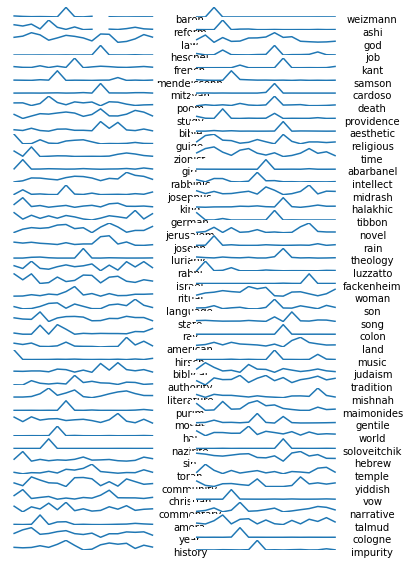

In [12]:
# plot it
# the number of rows depends on the number of words
# number of words = rows x cols
rows = 43
cols = 2
words = np.asarray(sorted_words).reshape(rows,cols, order='F')

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(6,10))
for r_i in range(rows):
    for c_i in range(cols):
        word = words[r_i, c_i]
        x = top_df[word].values
        axs[r_i, c_i].plot(x)
        axs[r_i, c_i].yaxis.set_label_position("right")
        axs[r_i, c_i].set_ylabel(word, rotation=0)
        axs[r_i, c_i].yaxis.set_label_coords(1.2, 0.25)
        for k,v in axs[r_i, c_i].spines.items():
            v.set_visible(False)
        axs[r_i, c_i].set_xticks([])
        axs[r_i, c_i].set_yticks([])
fig.tight_layout()
plt.savefig("sparklines.png", dpi=100)
# show it
plt.show()

The output is saved in the same directory as the notebook. The last code block is somewhat of a playground to plot only one line at a time for debugging or tweaking the aesthetics.

[]

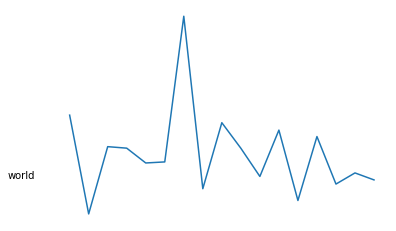

In [30]:
# fig, ax = plt.subplots()
# x = top_df['world'].values
# plt.plot(x)
# ax.set_ylabel('world', rotation=0)
# ax.yaxis.set_label_coords(-0.1,0.2)
# for k,v in ax.spines.items():
#     v.set_visible(False)
# ax.set_xticks([])
# ax.set_yticks([])